# 모두의 딥러닝 개정 3판 
## 11장 데이터 다루기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 입력 feature 8개, target 1개
# 이진분류
df = pd.read_csv('data/pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [4]:
# 정보별 특징을 좀 더 자세히 알고 싶을 때
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 각 항목별 상관관계 파악
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


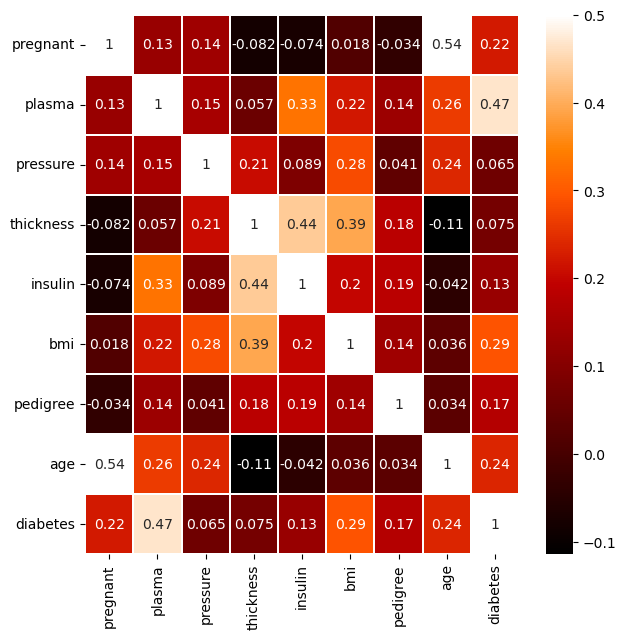

In [6]:
# 두 항목이 전혀 다른 패턴으로 변화하면 0
# 서로 비슷한 패턴으로 변할수록 1에 가까운 값을 출력
colormap = plt.cm.gist_heat
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap,
            linecolor='white', annot=True)
plt.show()

- 위 결과에서 plasma와 BMI가 diabetes과 상관관계가 높다는 것을 알 수 있음   
  plasma와 BMI 각각 diabetes과의 관계를 알아보자

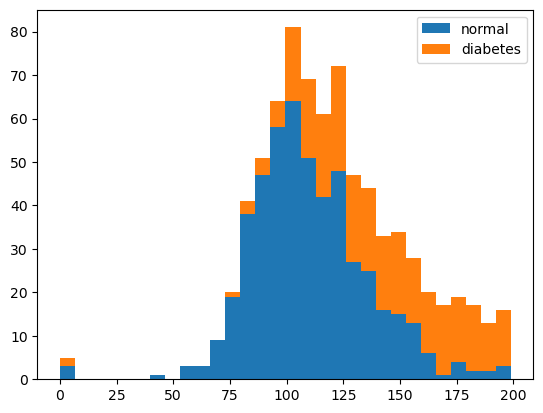

In [7]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30,
           histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
plt.show()

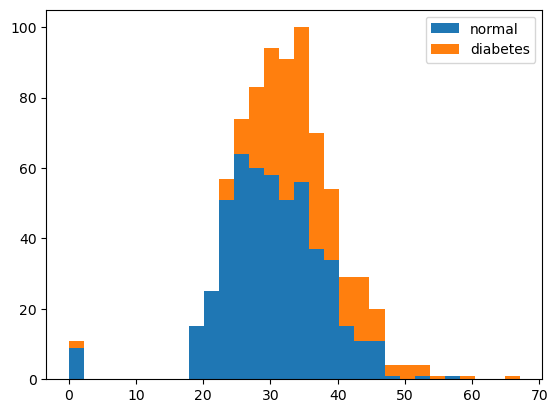

In [8]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30,
           histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
plt.show()

결과에 크게 영향을 미치는 항목을 미리 확인하여 데이터 전처리 필요

In [9]:
from tensorflow.keras import models, layers

In [10]:
# X와 y 각각 해당 범위만큼 저장하기
X = df.iloc[:, :8]
y = df.iloc[:, 8]

In [11]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [12]:
print(type(y))

<class 'pandas.core.series.Series'>


In [13]:
X.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64


In [15]:
# 모델 구조 설정 (컬럼 이름 부여; name='')
model = models.Sequential()
model.add(layers.Dense(12, input_dim=8, activation='relu', name='input_layer'))
model.add(layers.Dense(8, activation='relu', name='hidden_layer'))
model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 12)                108       
                                                                 
 hidden_layer (Dense)        (None, 8)                 104       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


- Output Shape(batch_size, 행(샘플)의 수, 열(속성)의 수)
- Param : 파라미터 수, 즉 총 가중치와 bias 수의 합    
|   

입력층 weight 8 12   
입력층 bias 1 12

은닉층 weight 12 8   
은닉층 bias 1 8

출력층 weight 8 1   
출력층 bias 1 1

param 221 (108+104+9)

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 4ms/step - loss: 2.3819 - accuracy: 0.6302
Epoch 2/100
154/154 [==============================] - 1s 3ms/step - loss: 0.7965 - accuracy: 0.6445
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.6497
Epoch 4/100
154/154 [==============================] - 1s 3ms/step - loss: 0.6676 - accuracy: 0.6693
Epoch 5/100
154/154 [==============================] - 1s 3ms/step - loss: 0.6775 - accuracy: 0.6432
Epoch 6/100
154/154 [==============================] - 1s 3ms/step - loss: 0.6616 - accuracy: 0.6445
Epoch 7/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6456 - accuracy: 0.6797
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.6693
Epoch 9/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6166 - accuracy: 0.6667
Epoch 10/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6222 - accura

154/154 [==============================] - 1s 6ms/step - loss: 0.4820 - accuracy: 0.7487
Epoch 82/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4811 - accuracy: 0.7682
Epoch 83/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4859 - accuracy: 0.7734
Epoch 84/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4822 - accuracy: 0.7617
Epoch 85/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4835 - accuracy: 0.7682
Epoch 86/100
154/154 [==============================] - 1s 7ms/step - loss: 0.4770 - accuracy: 0.7669
Epoch 87/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4795 - accuracy: 0.7643
Epoch 88/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4855 - accuracy: 0.7695
Epoch 89/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4778 - accuracy: 0.7799
Epoch 90/100
154/154 [==============================] - 1s 6ms/step - loss: 0.4772 - accuracy: 

층과 노드의 수는 사용자가 설정하면 된다